# Problem Statement

#### This project aims to analyze energy consumption data from smart home devices to understand usage patterns, predict future energy needs, and provide actionable optimization strategies that reduce costs and environmental impact.

In [1]:
#Load required libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load dataset
data = pd.read_csv("Household Data.csv")

##### Display Basic Information about Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [4]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [5]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0
...,...,...,...,...,...,...,...,...,...
1048570,13/12/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,13/12/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,13/12/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,13/12/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0


##### Data Cleaning

In [6]:
# Handling Missing Values
data.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [7]:
data = data.dropna(subset = ["Sub_metering_3"])

In [8]:
#Again checking for null values 
data.isnull().sum().sum()

0

In [9]:
# Convert Data Types

#Ensuring date-time is in the correct format
data['Date_Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time']) 
data = data.set_index('Date_Time')

C:\Users\DELL\AppData\Local\Temp\ipykernel_12848\1314334093.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12848\1314334093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


In [10]:
# Filter relevant data
data= data['16/12/2006 ' : '13/12/2008']

In [11]:
#Scale Data
# Use Min-Max Scaling or Standardization for numerical columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Global_active_power']] = scaler.fit_transform(data[['Global_active_power']])

##### Feature Engineering

In [12]:
#Extract feature like hour, day of week

data['Hour'] = data.index.hour
data['Day_of_week'] = data.index.dayofweek

##### Validate the Prepared Data

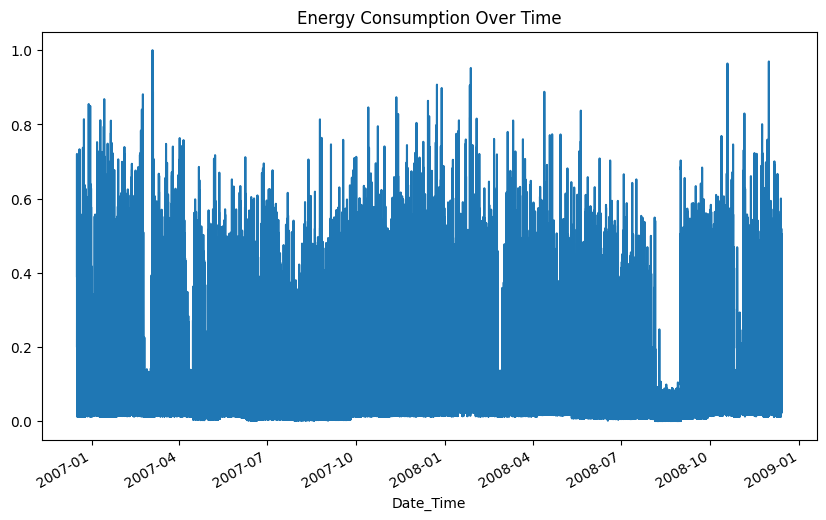

In [13]:
#Plot time-series data to confirm trends
data['Global_active_power'].plot(figsize=(10, 6))
plt.title("Energy Consumption Over Time")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12848\2748350882.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12848\2748350882.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'], errors='coerce')


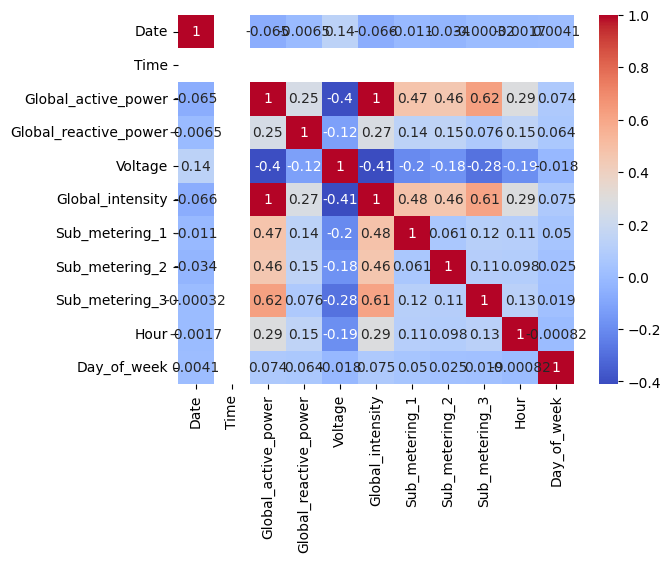

In [14]:
#Check correlations between features


# Convert a 'Date' & 'Time' column to a numeric format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].map(pd.Timestamp.toordinal) 

data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
data['Time'] = data['Time'].map(pd.Timestamp.toordinal) 

#select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

#plot heatmap
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

####  Exploratory Data Analysis (EDA)

##### Analyze Time-Series Patterns

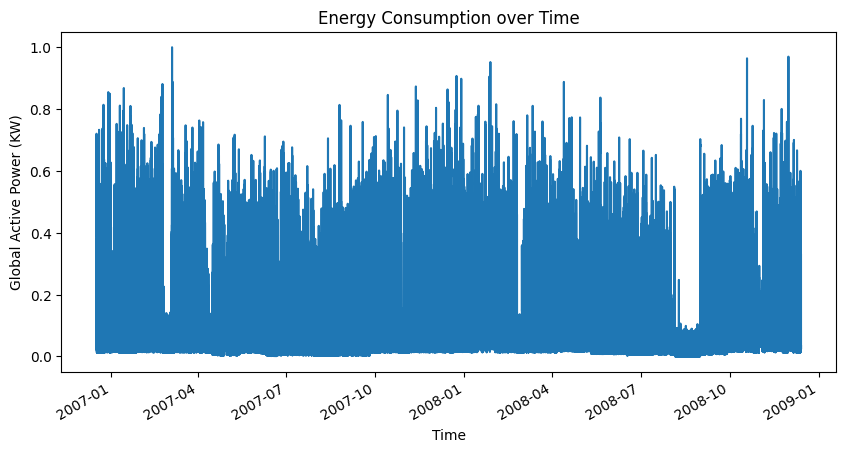

In [15]:
#Visualize Energy Consumption Over Time
data['Global_active_power'].plot(figsize = (10,5) , title = 'Energy Consumption over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (KW)')
plt.show()

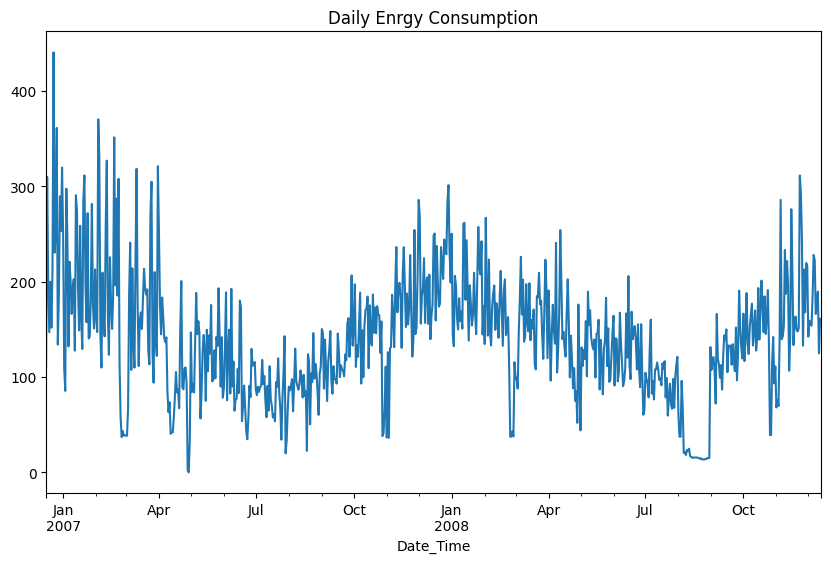

In [16]:
# Daily and Weekly Patterns

daily_usage = data['Global_active_power'].resample('D').sum()
daily_usage.plot(title = 'Daily Enrgy Consumption' , figsize = (10,6))
plt.show()

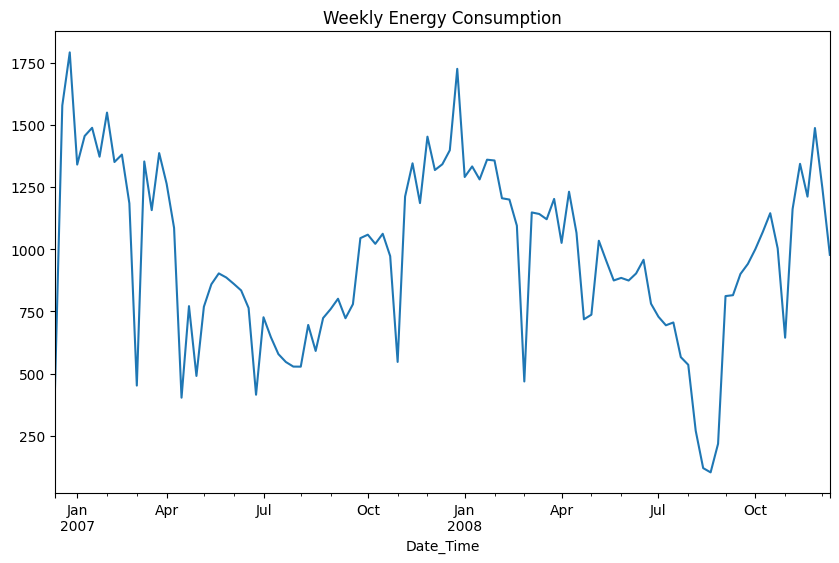

In [17]:
weekly_usage = data['Global_active_power'].resample('W').sum()
weekly_usage.plot(title="Weekly Energy Consumption", figsize=(10, 6))
plt.show()

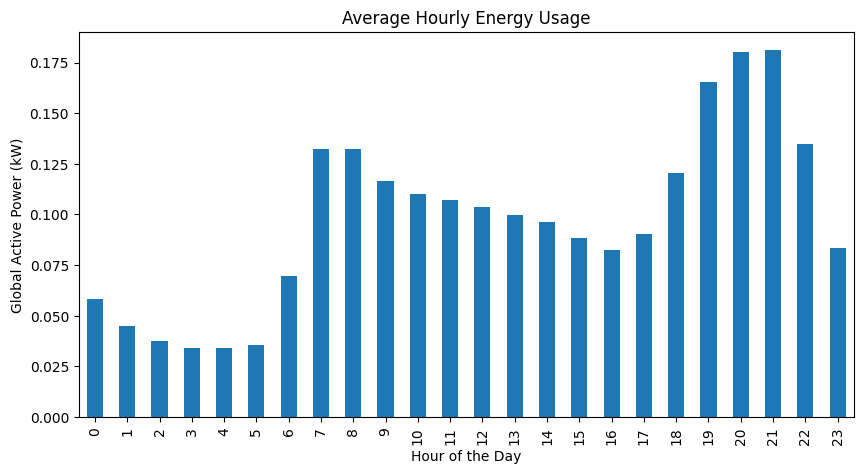

In [18]:
#Hourly Trends
hourly_usage = data.groupby(data.index.hour)['Global_active_power'].mean()
hourly_usage.plot(kind='bar', title="Average Hourly Energy Usage", figsize=(10, 5))
plt.xlabel("Hour of the Day")
plt.ylabel("Global Active Power (kW)")
plt.show()

##### Detect Anomalies

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


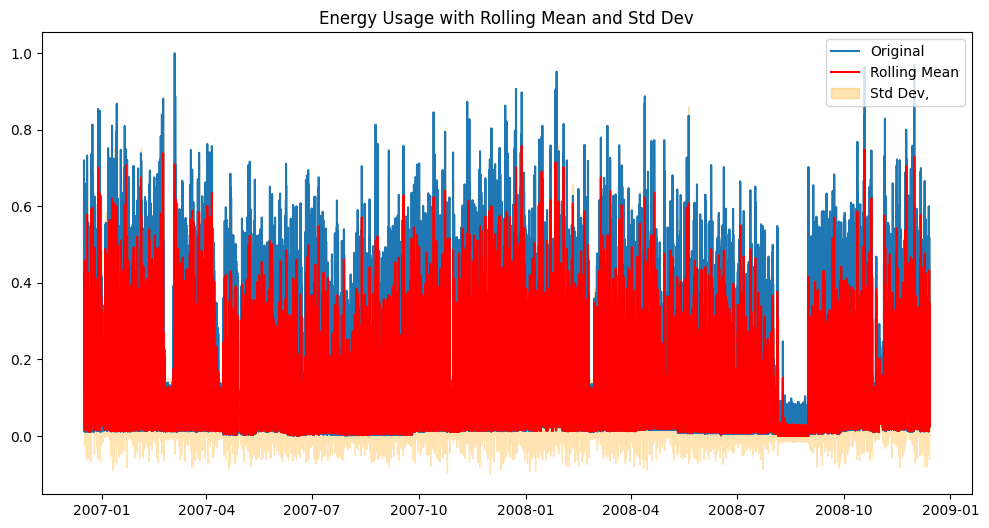

In [19]:
# Identify Unusual consumption spikes or drops
rolling_mean = data['Global_active_power'].rolling(window = 24).mean()
rolling_std = data['Global_active_power'].rolling(window = 24).std()

plt.figure(figsize = (12,6))
plt.plot(data ['Global_active_power'], label = 'Original')
plt.plot(rolling_mean, label = 'Rolling Mean', color = 'red')
plt.fill_between(
    data.index, rolling_mean - rolling_std , rolling_mean + rolling_std, color = 'orange', alpha = 0.3, label = 'Std Dev,'
)

plt.legend()
plt.title('Energy Usage with Rolling Mean and Std Dev')
plt.show()

##### Correlation Analysis

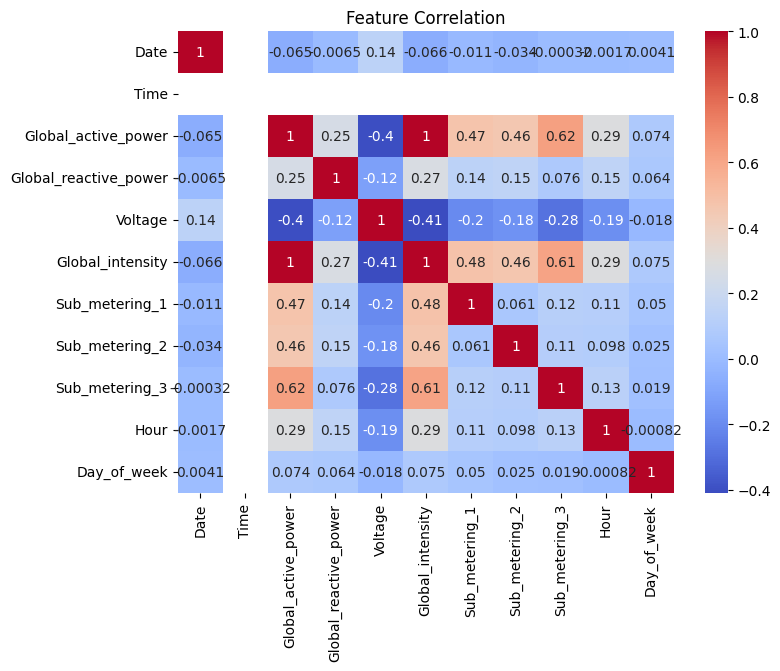

In [20]:
# Analyze relationship between features using a heatmap

correlation_matrix = data.corr()
plt.figure(figsize= (8,6))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm')
plt.title('Feature Correlation')
plt.show()

##### Identify Peak Consumption Periods

In [21]:
# Find and Visualize periods of maximum usage

peak_periods  = data['Global_active_power'].nlargest(10)
peak_periods

print('Top 10 Peak Periods Consumtions\n', peak_periods)

Top 10 Peak Periods Consumtions
 Date_Time
2007-03-04 19:34:00    1.000000
2007-03-04 19:33:00    0.998112
2008-11-30 20:19:00    0.969605
2008-10-19 01:24:00    0.964131
2008-01-27 19:24:00    0.952048
2007-03-04 19:32:00    0.951293
2008-11-30 20:17:00    0.943742
2008-10-19 01:25:00    0.942798
2008-11-30 20:18:00    0.936190
2008-10-19 01:27:00    0.930904
Name: Global_active_power, dtype: float64


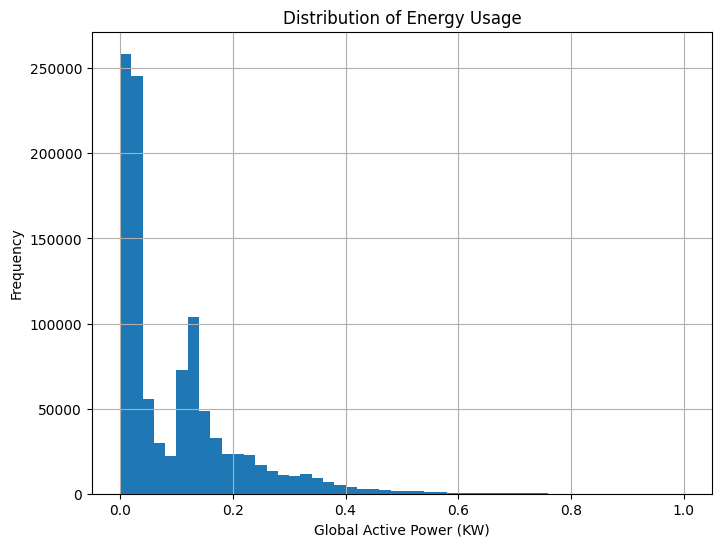

In [22]:
# Visualize the distribution of energy usage
data ['Global_active_power'].hist(bins = 50, figsize = (8,6))
plt.title('Distribution of Energy Usage')
plt.xlabel('Global Active Power (KW)')
plt.ylabel('Frequency')
plt.show()

### Time-Based Features

In [23]:
# Extract time-based features like hour, day, and weekend/weekday
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

#### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])

data_scaled = pd.DataFrame(scaled_features, columns=['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],index=data.index)

### Modeling

##### Time Series Modeling 

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

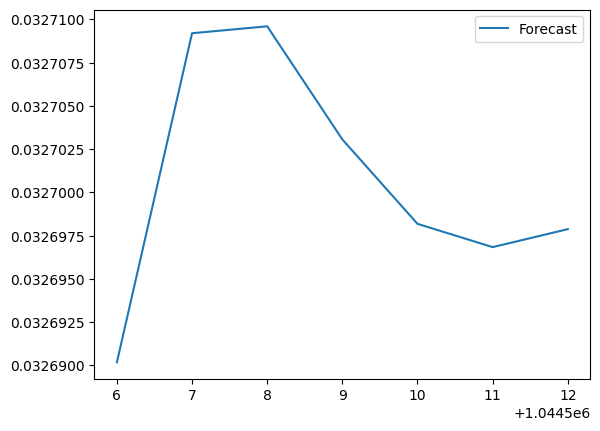

In [25]:
# Use ARIMA to forecast future energy consumption
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Global_active_power'], order=(5, 1, 0))  
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=7)  
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

#### Random Forest Regression

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Define features (X) and target (y)
X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = data['Global_active_power']

# Standardize features for better model performance 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Random Forest model with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=50,         
    max_depth=15,            
    max_features='sqrt',     
    n_jobs=-1,               
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")

MAE: 0.0024305193829195267, RMSE: 0.004250709745012776, R²: 0.99841797845229


#### Optimization

In [27]:
# Set threshold based on your data
if y_pred.mean() > 0.5:  
    print("Recommendation: Reduce energy usage during peak hours.")
else:
    print("Energy usage is within optimal limits.")

Energy usage is within optimal limits.
